In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
dataset = pd.read_excel("Weekly FTE.xlsx")

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Week       552 non-null    datetime64[ns]
 1   Nrlzd FTE  552 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.8 KB


In [51]:
dataset["Week"] = pd.to_datetime(dataset["Week"], errors = "coerce")

In [45]:
dataset = dataset.set_index("Week")

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 552 entries, 2013-01-07 to 2023-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nrlzd FTE  552 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [47]:
TS = dataset.resample("W").first()

In [48]:
print(TS.head(),"\n\n",dataset.head())

              Nrlzd FTE
Week                   
2013-01-13  1132.904654
2013-01-20  1134.796269
2013-01-27  1133.313552
2013-02-03  1127.184229
2013-02-10  1158.713311 

               Nrlzd FTE
Week                   
2013-01-07  1132.904654
2013-01-14  1134.796269
2013-01-21  1133.313552
2013-01-28  1127.184229
2013-02-04  1158.713311


<Axes: xlabel='Week'>

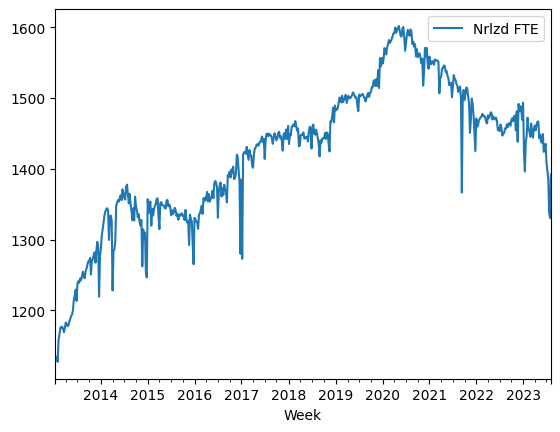

In [22]:
TS.plot()

In [24]:
TS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 552 entries, 2013-01-13 to 2023-08-06
Freq: W-SUN
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nrlzd FTE  552 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


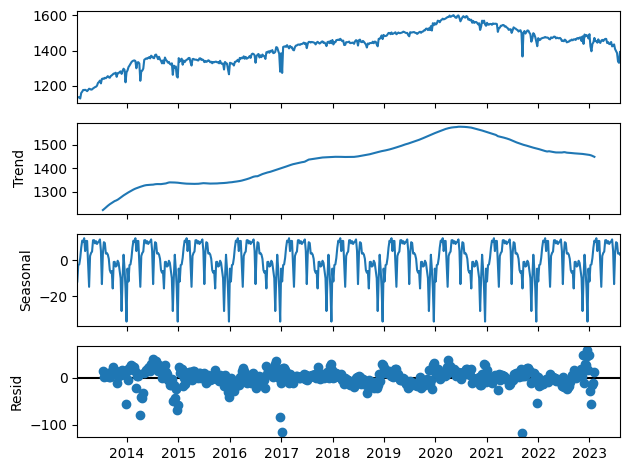

In [23]:
seasonal_decompose(TS).plot();

In [25]:
train = TS.iloc[:526]
test = TS.iloc[526:]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 552 entries, 2013-01-07 to 2023-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nrlzd FTE  552 non-null    float64
dtypes: float64(1)
memory usage: 24.8 KB


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 526 entries, 2013-01-13 to 2023-02-05
Freq: W-SUN
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nrlzd FTE  526 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2023-02-12 to 2023-08-06
Freq: W-SUN
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nrlzd FTE  26 non-null     float64
dtypes: float64(1)
memory usage: 416.0 bytes


In [36]:
model = ExponentialSmoothing( train, trend='add', seasonal='add' ).fit()

<Axes: xlabel='Week'>

<Figure size 1200x600 with 0 Axes>

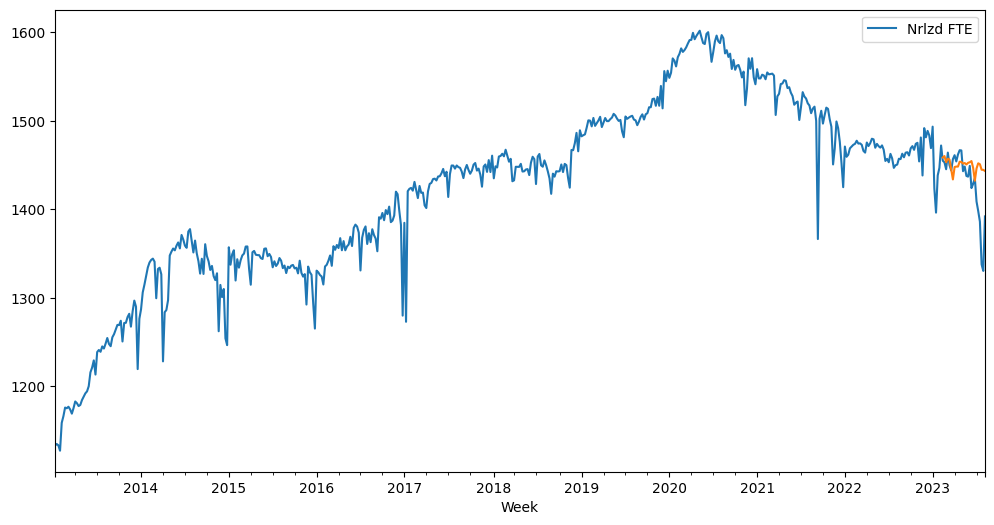

In [37]:
plt.figure(figsize=(12,6))
TS.plot()
model.forecast(26).plot(figsize=(12,6))

Data360 YP

In [41]:

forcst = pd.DataFrame(model.forecast(26))
forcst = forcst.reset_index()
forcst.columns = ["Week","Nrlzd FTE"]
forcst["Week"] = pd.to_datetime(forcst["Week"])

In [42]:
forcst.head()

,Week,Nrlzd FTE
0,2023-02-12,1458.622551
1,2023-02-19,1460.194528
2,2023-02-26,1453.275712
3,2023-03-05,1457.269479
4,2023-03-12,1456.208316
